# P-ONE basic data analysis

The data analysis has been performed on a P-ONE simulation file. This file has 1000 DAQ frames, which corresponds to 1000 events. Each frame contains following 8 files, each with an unique set of information:

1) **I3EventHeader**: Contains general info about the overall event, like start and end times, event ID, etc.  <br>
2) **I3MCTree**: Contains detailed info about the primary particles (i.e. neutrinos), hadrons at the interaction vertex and all the secondary particles that travel through the medium, i.e. electrons, muons or tauons. <br>
3) **I3MCTree_NuGen**: Contains info about the incoming neutrinos and hadrons formed at the interaction vertex. <br>
4) **I3MCTree_NuGen_RNGState**: Not really that important for data analysis.  <br>
5) **I3MCWeightDict**: Contains detailed info about the physical properties of the detector and data related to the incoming neutrinos.  <br>
6) **MCTimeIncEventID**: A boolean file, not that important. <br>
7) **MMCTrackList**: Contains info about the secondary particles that travel through the medium. <br>
8) **NuGPrimary**: Contains info about the primary particles (i.e. neutrinos) reaching the detector from their sources. <br>

In [1]:
from I3Tray import *
from icecube import icetray, dataclasses, phys_services, sim_services, dataio,  earthmodel_service, neutrino_generator, tableio, hdfwriter
from icecube.simprod import segments
from icecube.icetray import I3Units, I3Frame
from icecube.dataclasses import I3Particle
from icecube.simclasses import I3MMCTrack
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
import sys, os
import math

## 1. Plots for Zenith angles

In [2]:
infile_name="/home/users/kaustav/pone_offline/Examples/output.i3"
infile=dataio.I3File(infile_name)

In [3]:
zenith_primary=[]
for frame in infile:
    infile.pop_frame()
    zenith_primary.append(frame['NuGPrimary'].dir.zenith)

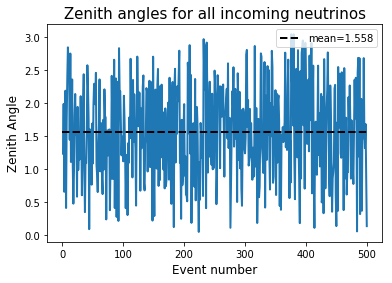

In [4]:
events=list(range(1, len(zenith_primary)+1))
mean_primary=np.mean(zenith_primary)
x_mean = [0, 500]
y_mean = [mean_primary,mean_primary]
plt.plot(events, zenith_primary, linewidth=2)
plt.plot(x_mean,y_mean ,label='mean='+str(round(mean_primary,3)), linewidth=2,linestyle='dashed',color='black')
plt.xlabel("Event number",fontsize=12)
plt.ylabel("Zenith Angle",fontsize=12)
plt.title("Zenith angles for all incoming neutrinos",fontsize=15)
plt.legend(loc='upper right')
plt.show()

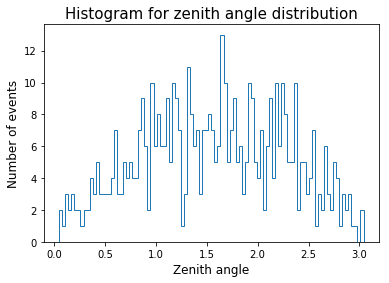

In [5]:
zenith_primary=[round(num,2) for num in zenith_primary]
plt.hist(zenith_primary,bins=100,histtype='step')
#plt.ylim(0,max(counts)+1)
plt.xlabel('Zenith angle',fontsize=12)
plt.ylabel('Number of events',fontsize=12)
plt.title("Histogram for zenith angle distribution",fontsize=15)
plt.show()

In [4]:
infile_name="/home/users/kaustav/pone_offline/Examples/output.i3"
infile=dataio.I3File(infile_name)

In [5]:
zenith_primary_nue=[]
for frame in infile:
    infile.pop_frame()
    if(frame['NuGPrimary'].pdg_encoding==12 or frame['NuGPrimary'].pdg_encoding==-12):
        zenith_primary_nue.append(frame['NuGPrimary'].dir.zenith)

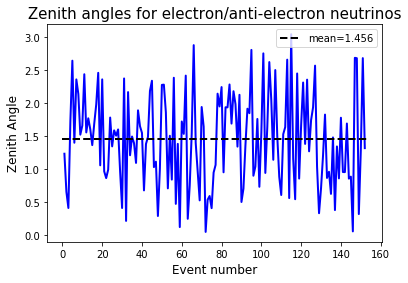

In [8]:
events_nue=list(range(1, len(zenith_primary_nue)+1))
mean_primary=np.mean(zenith_primary_nue)
x_mean = [0,len(zenith_primary_nue)+1]
y_mean = [mean_primary,mean_primary]
plt.plot(events_nue, zenith_primary_nue, linewidth=2,color='b')
plt.plot(x_mean,y_mean ,label='mean='+str(round(mean_primary,3)), linewidth=2,linestyle='dashed',color='black')
plt.xlabel("Event number",fontsize=12)
plt.ylabel("Zenith Angle",fontsize=12)
plt.title("Zenith angles for electron/anti-electron neutrinos",fontsize=15)
plt.legend(loc='upper right')
plt.show()

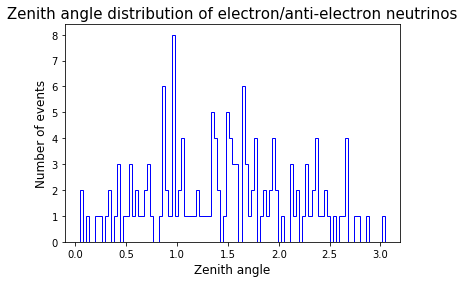

In [16]:
zenith_primary_nue=[round(num,2) for num in zenith_primary_nue]
plt.hist(zenith_primary_nue,bins=100,histtype='step',color='blue')
plt.xlabel('Zenith angle',fontsize=12)
plt.ylabel('Number of events',fontsize=12)
plt.title("Zenith angle distribution of electron/anti-electron neutrinos",fontsize=15)
plt.show()

In [6]:
infile_name="/home/users/kaustav/pone_offline/Examples/output.i3"
infile=dataio.I3File(infile_name)

In [7]:
zenith_primary_numu=[]
for frame in infile:
    infile.pop_frame()
    if(frame['NuGPrimary'].pdg_encoding==14 or frame['NuGPrimary'].pdg_encoding==-14):
        zenith_primary_numu.append(frame['NuGPrimary'].dir.zenith)

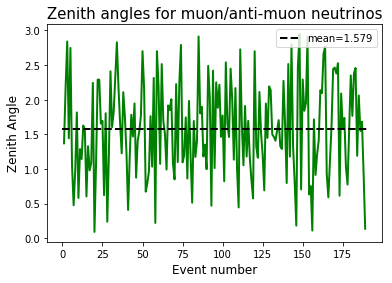

In [11]:
events_numu=list(range(1, len(zenith_primary_numu)+1))
mean_primary=np.mean(zenith_primary_numu)
x_mean = [0,len(zenith_primary_numu)+1]
y_mean = [mean_primary,mean_primary]
plt.plot(events_numu, zenith_primary_numu, linewidth=2,color='g')
plt.plot(x_mean,y_mean ,label='mean='+str(round(mean_primary,3)), linewidth=2,linestyle='dashed',color='black')
plt.xlabel("Event number",fontsize=12)
plt.ylabel("Zenith Angle",fontsize=12)
plt.title("Zenith angles for muon/anti-muon neutrinos",fontsize=15)
plt.legend(loc='upper right')
plt.show()

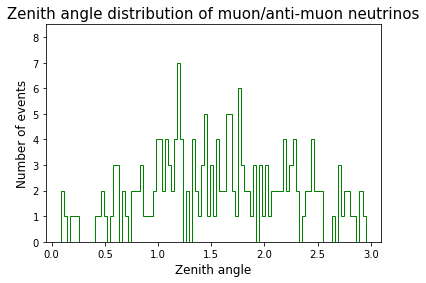

In [12]:
zenith_primary_numu=[round(num,2) for num in zenith_primary_numu]
plt.hist(zenith_primary_numu,bins=100,histtype='step',color='green')
plt.xlabel('Zenith angle',fontsize=12)
plt.ylabel('Number of events',fontsize=12)
plt.ylim(0,8.5)
plt.title("Zenith angle distribution of muon/anti-muon neutrinos",fontsize=15)
plt.show()

In [8]:
infile_name="/home/users/kaustav/pone_offline/Examples/output.i3"
infile=dataio.I3File(infile_name)

In [9]:
zenith_primary_nutau=[]
for frame in infile:
    infile.pop_frame()
    if(frame['NuGPrimary'].pdg_encoding==16 or frame['NuGPrimary'].pdg_encoding==-16):
        zenith_primary_nutau.append(frame['NuGPrimary'].dir.zenith)

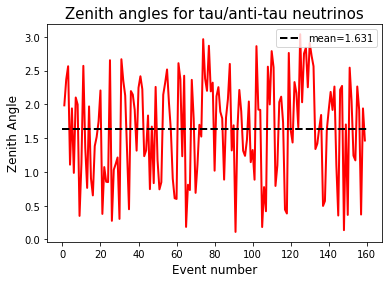

In [14]:
events_nutau=list(range(1, len(zenith_primary_nutau)+1))
mean_primary=np.mean(zenith_primary_nutau)
x_mean = [0,len(zenith_primary_nutau)+1]
y_mean = [mean_primary,mean_primary]
plt.plot(events_nutau, zenith_primary_nutau, linewidth=2,color='r')
plt.plot(x_mean,y_mean ,label='mean='+str(round(mean_primary,3)), linewidth=2,linestyle='dashed',color='black')
plt.xlabel("Event number",fontsize=12)
plt.ylabel("Zenith Angle",fontsize=12)
plt.title("Zenith angles for tau/anti-tau neutrinos",fontsize=15)
plt.legend(loc='upper right')
plt.show()

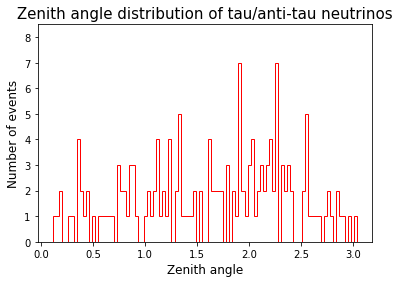

In [11]:
zenith_primary_nutau=[round(num,2) for num in zenith_primary_nutau]
plt.hist(zenith_primary_nutau,bins=100,histtype='step',color='red')
plt.xlabel('Zenith angle',fontsize=12)
plt.ylabel('Number of events',fontsize=12)
plt.ylim(0,8.5)
plt.title("Zenith angle distribution of tau/anti-tau neutrinos",fontsize=15)
plt.show()

In [15]:
infile_name="/home/users/kaustav/pone_offline/Examples/output.i3"
infile=dataio.I3File(infile_name)

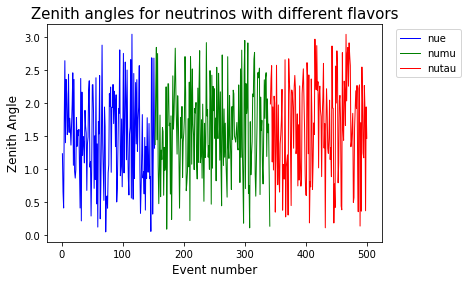

In [31]:
events_nue=list(range(1, len(zenith_primary_nue)+1))
events_numu=list(range(len(events_nue)+1,len(events_nue)+len(zenith_primary_numu)+1))
events_nutau=list(range(len(events_nue)+len(events_numu)+1,len(events_nue)+len(events_numu)+len(zenith_primary_nutau)+1))
plt.plot(events_nue, zenith_primary_nue, linewidth=1,color='b',label='nue')
plt.plot(events_numu, zenith_primary_numu, linewidth=1,color='g',label='numu')
plt.plot(events_nutau, zenith_primary_nutau, linewidth=1,color='r',label='nutau')
plt.xlabel("Event number",fontsize=12)
plt.ylabel("Zenith Angle",fontsize=12)
plt.title("Zenith angles for neutrinos with different flavors",fontsize=15)
plt.legend(loc='upper right',bbox_to_anchor=(1.25, 1))
plt.show()

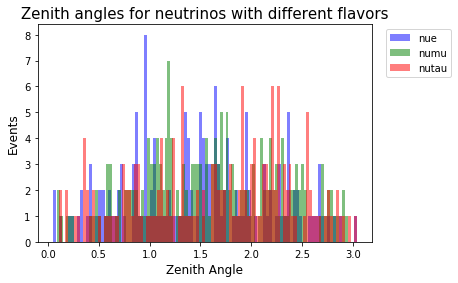

In [17]:
plt.hist(zenith_primary_nue,bins=100,color='b',alpha=0.5,label='nue')
plt.hist(zenith_primary_numu,bins=100,color='g',alpha=0.5,label='numu')
plt.hist(zenith_primary_nutau,bins=100,color='r',alpha=0.5,label='nutau')
plt.xlabel("Zenith Angle",fontsize=12)
plt.ylabel("Events",fontsize=12)
plt.title("Zenith angles for neutrinos with different flavors",fontsize=15)
plt.legend(loc='upper right',bbox_to_anchor=(1.25, 1))
plt.show()

## 2. Plots for Energies

In [33]:
infile_name="/home/users/kaustav/pone_offline/Examples/output.i3"
infile=dataio.I3File(infile_name)

In [34]:
energy_primary=[]
for frame in infile:
    infile.pop_frame()
    #zenith_primary.append(frame['NuGPrimary'].dir.zenith)
    energy_primary.append(np.log(frame['NuGPrimary'].energy))

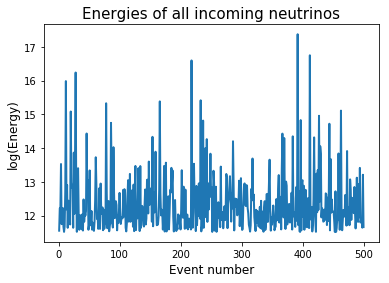

In [35]:
plt.plot(events, energy_primary, linewidth=2)
plt.xlabel("Event number",fontsize=12)
plt.ylabel("log(Energy)",fontsize=12)
plt.title("Energies of all incoming neutrinos",fontsize=15)
plt.show()

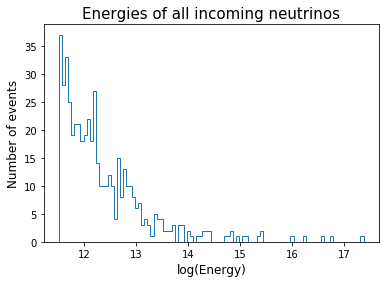

In [39]:
#energy_primary=[round(num,2) for num in energy_primary]
plt.hist(energy_primary,bins=100,histtype='step')
#plt.ylim(0,max(counts)+1)
plt.xlabel('log(Energy)',fontsize=12)
plt.ylabel('Number of events',fontsize=12)
plt.title("Energies of all incoming neutrinos",fontsize=15)
plt.show()

In [10]:
infile_name="/home/users/kaustav/pone_offline/Examples/output.i3"
infile=dataio.I3File(infile_name)

In [11]:
energy_primary_nue=[]
for frame in infile:
    infile.pop_frame()
    if(frame['NuGPrimary'].pdg_encoding==12 or frame['NuGPrimary'].pdg_encoding==-12):
        energy_primary_nue.append(np.log(frame['NuGPrimary'].energy))

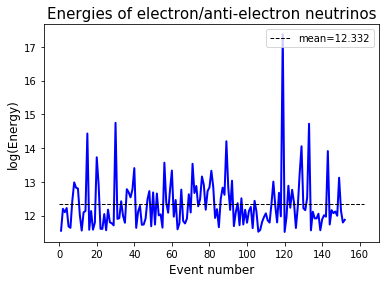

In [48]:
events_nue=list(range(1, len(energy_primary_nue)+1))
mean_primary=np.mean(energy_primary_nue)
x_mean = [0,len(energy_primary_nue)+10]
y_mean = [mean_primary,mean_primary]
plt.plot(events_nue, energy_primary_nue, linewidth=2,color='b')
plt.plot(x_mean,y_mean ,label='mean='+str(round(mean_primary,3)), linewidth=1,linestyle='dashed',color='black')
plt.xlabel("Event number",fontsize=12)
plt.ylabel("log(Energy)",fontsize=12)
plt.title("Energies of electron/anti-electron neutrinos",fontsize=15)
plt.legend(loc='upper right')
plt.show()

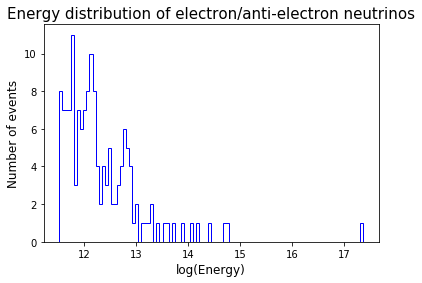

In [50]:
energy_primary_nue=[round(num,2) for num in energy_primary_nue]
plt.hist(energy_primary_nue,bins=100,histtype='step',color='blue')
plt.xlabel('log(Energy)',fontsize=12)
plt.ylabel('Number of events',fontsize=12)
plt.title("Energy distribution of electron/anti-electron neutrinos",fontsize=15)
plt.show()

In [14]:
infile_name="/home/users/kaustav/pone_offline/Examples/output.i3"
infile=dataio.I3File(infile_name)

In [13]:
energy_primary_numu=[]
for frame in infile:
    infile.pop_frame()
    if(frame['NuGPrimary'].pdg_encoding==14 or frame['NuGPrimary'].pdg_encoding==-14):
        energy_primary_numu.append(np.log(frame['NuGPrimary'].energy))

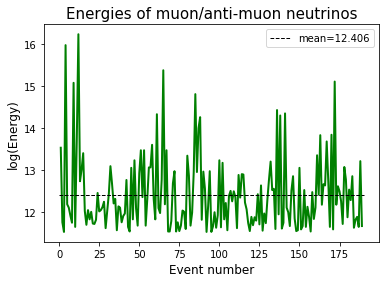

In [69]:
events_numu=list(range(1, len(energy_primary_numu)+1))
mean_primary=np.mean(energy_primary_numu)
x_mean = [0,len(energy_primary_numu)+1]
y_mean = [mean_primary,mean_primary]
plt.plot(events_numu, energy_primary_numu, linewidth=2,color='green')
plt.plot(x_mean,y_mean ,label='mean='+str(round(mean_primary,3)), linewidth=1,linestyle='dashed',color='black')
plt.xlabel("Event number",fontsize=12)
plt.ylabel("log(Energy)",fontsize=12)
plt.title("Energies of muon/anti-muon neutrinos",fontsize=15)
plt.legend(loc='upper right')
plt.show()

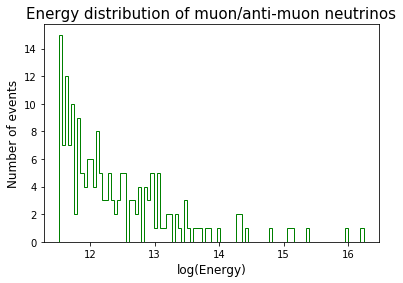

In [59]:
energy_primary_numu=[round(num,2) for num in energy_primary_numu]
plt.hist(energy_primary_numu,bins=100,histtype='step',color='green')
plt.xlabel('log(Energy)',fontsize=12)
plt.ylabel('Number of events',fontsize=12)
plt.title("Energy distribution of muon/anti-muon neutrinos",fontsize=15)
plt.show()

In [15]:
energy_primary_nutau=[]
for frame in infile:
    infile.pop_frame()
    if(frame['NuGPrimary'].pdg_encoding==16 or frame['NuGPrimary'].pdg_encoding==-16):
        energy_primary_nutau.append(np.log(frame['NuGPrimary'].energy))

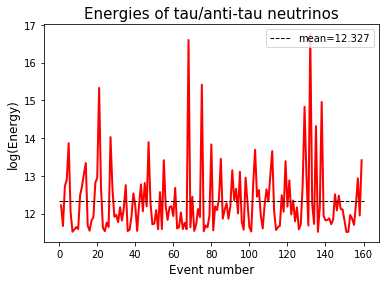

In [62]:
events_nutau=list(range(1, len(energy_primary_nutau)+1))
mean_primary=np.mean(energy_primary_nutau)
x_mean = [0,len(energy_primary_nutau)+1]
y_mean = [mean_primary,mean_primary]
plt.plot(events_nutau, energy_primary_nutau, linewidth=2,color='red')
plt.plot(x_mean,y_mean ,label='mean='+str(round(mean_primary,3)), linewidth=1,linestyle='dashed',color='black')
plt.xlabel("Event number",fontsize=12)
plt.ylabel("log(Energy)",fontsize=12)
plt.title("Energies of tau/anti-tau neutrinos",fontsize=15)
plt.legend(loc='upper right')
plt.show()

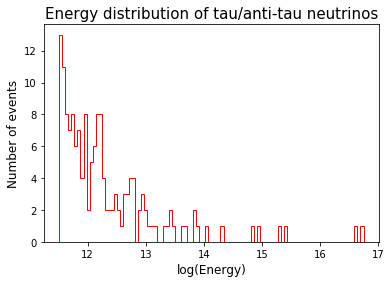

In [65]:
energy_primary_nutau=[round(num,2) for num in energy_primary_nutau]
plt.hist(energy_primary_nutau,bins=100,histtype='step',color='red')
plt.xlabel('log(Energy)',fontsize=12)
plt.ylabel('Number of events',fontsize=12)
plt.title("Energy distribution of tau/anti-tau neutrinos",fontsize=15)
plt.show()

In [37]:
infile_name="/home/users/kaustav/pone_offline/Examples/output.i3"
infile=dataio.I3File(infile_name)

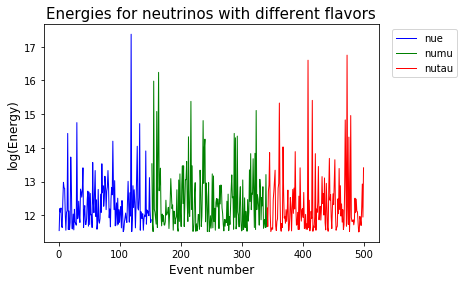

In [68]:
events_nue=list(range(1, len(zenith_primary_nue)+1))
events_numu=list(range(len(events_nue)+1,len(events_nue)+len(energy_primary_numu)+1))
events_nutau=list(range(len(events_nue)+len(events_numu)+1,len(events_nue)+len(events_numu)+len(energy_primary_nutau)+1))
plt.plot(events_nue, energy_primary_nue, linewidth=1,color='b',label='nue')
plt.plot(events_numu, energy_primary_numu, linewidth=1,color='g',label='numu')
plt.plot(events_nutau, energy_primary_nutau, linewidth=1,color='r',label='nutau')
plt.xlabel("Event number",fontsize=12)
plt.ylabel("log(Energy)",fontsize=12)
plt.title("Energies for neutrinos with different flavors",fontsize=15)
plt.legend(loc='upper right',bbox_to_anchor=(1.25, 1))
plt.show()

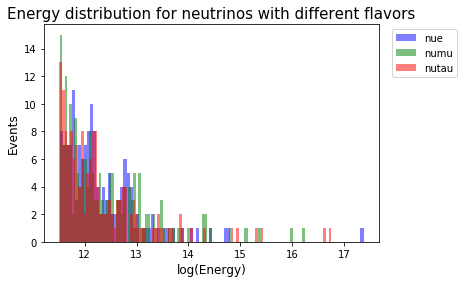

In [67]:
plt.hist(energy_primary_nue,bins=100,color='b',alpha=0.5,label='nue')
plt.hist(energy_primary_numu,bins=100,color='g',alpha=0.5,label='numu')
plt.hist(energy_primary_nutau,bins=100,color='r',alpha=0.5,label='nutau')
plt.xlabel("log(Energy)",fontsize=12)
plt.ylabel("Events",fontsize=12)
plt.title("Energy distribution for neutrinos with different flavors",fontsize=15)
plt.legend(loc='upper right',bbox_to_anchor=(1.25, 1))
plt.show()

## Overall scatter plot

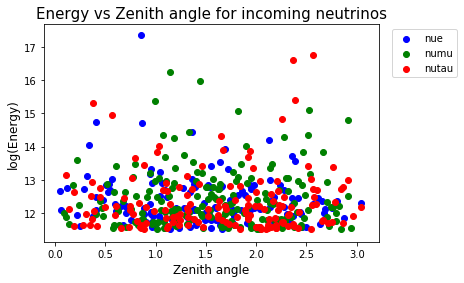

In [21]:
plt.scatter(zenith_primary_nue,energy_primary_nue,color='blue',label='nue')
plt.scatter(zenith_primary_numu,energy_primary_numu,color='green',label='numu')
plt.scatter(zenith_primary_nutau,energy_primary_nutau,color='red',label='nutau')
plt.xlabel("Zenith angle",fontsize=12)
plt.ylabel("log(Energy)",fontsize=12)
plt.title("Energy vs Zenith angle for incoming neutrinos",fontsize=15)
plt.legend(loc='upper right',bbox_to_anchor=(1.25, 1))
plt.show()
plt.show()